In [67]:
# -*- coding: utf-8 -*-
from pandas import read_csv, DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from itertools import product
import warnings
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
from scipy import stats

import statsmodels.api as sm

def invboxcox(x, lmbda = 0):
    if lmbda == 0:
        return(np.exp(x))
    else:
        return(np.exp(np.log(lmbda * x + 1) / lmbda))

In [68]:
dataset = read_csv('training.csv',
                     ',',
                     index_col=['Date'],
                     parse_dates=['Date'],
                     dayfirst=True)

In [69]:
datatest = read_csv('testing.csv',
                     ',',
                     index_col=['Date'],
                     parse_dates=['Date'],
                     dayfirst=True)

In [70]:
dataset['Value_boxcox'], lmbda = stats.boxcox(dataset.Value)

In [71]:
model_boxcox = sm.tsa.statespace.SARIMAX(dataset.Value_boxcox, 
                                      order=(1, 1, 6), 
                                      seasonal_order = (0, 0, 2, 12)).fit(disp = -1)
print ('Model AIC ', model_boxcox.aic)

('Model AIC ', 806.46445898185004)


('R2 score ', 0.017298639098388469)


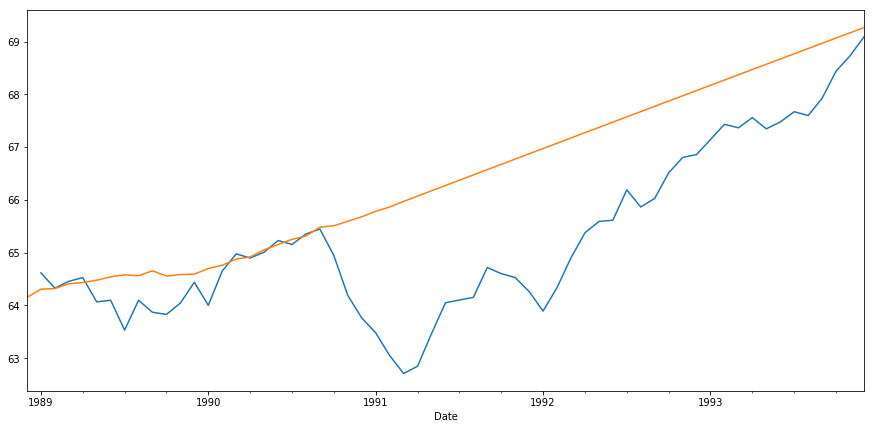

In [72]:
plt.figure(figsize=(15,7))
datatest.Value.plot()
pred_boxcox = invboxcox(model_boxcox.predict(start='1988-12-01', end='1993-12-01', typ = 'levels', dynamic = True), lmbda)
print ('R2 score ', r2_score(datatest.Value, pred_boxcox['1989-01-01':]))
pred_boxcox.plot()
plt.show()

In [73]:
model_boxcox = sm.tsa.statespace.SARIMAX(dataset.Value_boxcox, 
                                      order=(1, 1, 7), 
                                      seasonal_order = (0, 0, 2, 12)).fit(disp = -1)
print ('Model AIC ', model_boxcox.aic)

('Model AIC ', 809.71114419978699)


('R2 score ', -0.044359171243502749)


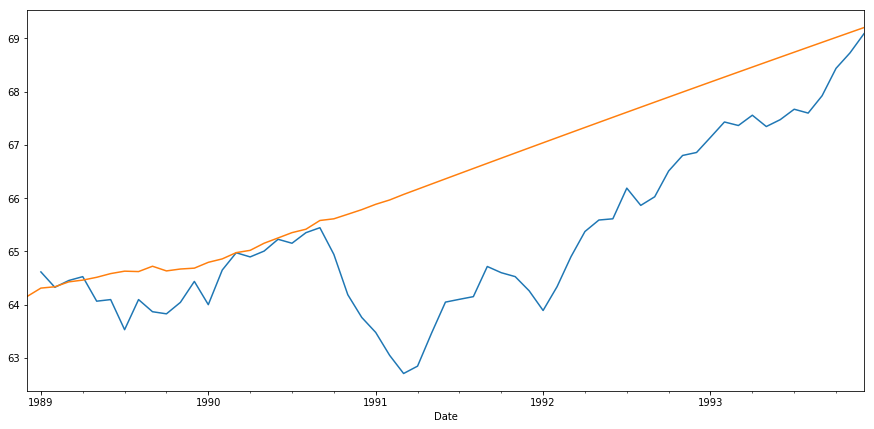

In [74]:
plt.figure(figsize=(15,7))
datatest.Value.plot()
pred_boxcox = invboxcox(model_boxcox.predict(start='1988-12-01', end='1993-12-01', typ = 'levels', dynamic = True), lmbda)
print ('R2 score ', r2_score(datatest.Value, pred_boxcox['1989-01-01':]))
pred_boxcox.plot()
plt.show()

In [75]:
model_boxcox = sm.tsa.statespace.SARIMAX(dataset.Value_boxcox, 
                                      order=(1, 1, 9), 
                                      seasonal_order = (0, 0, 2, 12)).fit(disp = -1)
print ('Model AIC ', model_boxcox.aic)

('Model AIC ', 815.05753774302093)


('R2 score ', 0.39633836500396447)


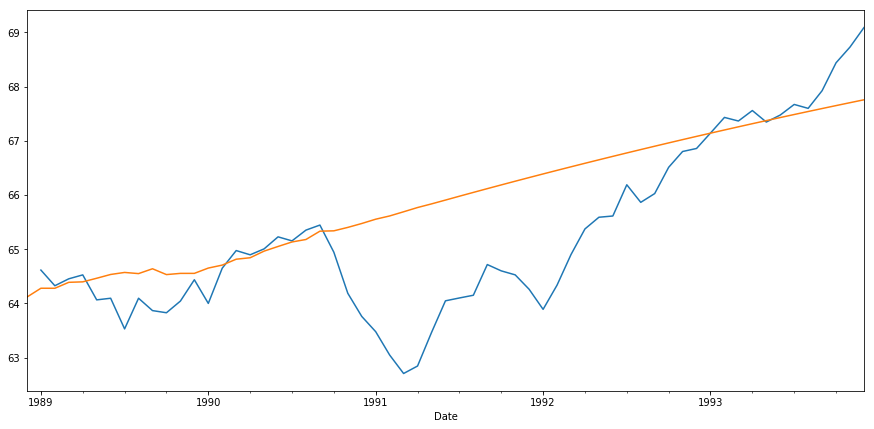

In [76]:
plt.figure(figsize=(15,7))
datatest.Value.plot()
pred_boxcox = invboxcox(model_boxcox.predict(start='1988-12-01', end='1993-12-01', typ = 'levels', dynamic = True), lmbda)
print ('R2 score ', r2_score(datatest.Value, pred_boxcox['1989-01-01':]))
pred_boxcox.plot()
plt.show()